# **DSCI100 Project: Predicting Usage of a Video Game Research Server**
- Name: Jonathan Leung
- Student Number: 50203389


## **(1) Data Description:**
The datasets were collected from a Minecraft server set up by a CS group at UBC, led by Frank Wood. The research group collected data regarding the players' actions within the server, such as gameplay, speech, and keystrokes (https://plaicraft.ai/)

### **Players Dataset** 
Contains 196 observations and 7 variables, including:
1. **experience**: Character variable; Skill level of player (Beginner, Amateur, Pro, or Veteran) 
2. **subscribe**: TRUE/FALSE logical variable; If the player is subscribed to the game
3. **hashedEmail**: Character variable; The player's encrypted email
4. **played_hours**: Numerical variable; The number of hours played
5. **name**: Character variable; Name of the player
6. **gender**: Character variable; Gender of the player (Male, Female, Non-binary, Two-spirited, Agender, and "Prefer not to say")
7. **Age**: Numerical variable; Age of the player

**Summary Statistics**
- Mean age of players is 21.14 years old
- Median age of players is 19.00 years old
- Average session is 5.85 hours

**Problems with dataset**
- Variable type: Must convert the character variable to factors before being able to tidy data


### **Sessions Dataset** 
Contains 1535 observations and 5 variables, including:
1. **hashedEmail**: Character variable; The player's encrypted email
2. **start_time**: Character variable; Start time of each session (Date and 24 hour time) 
3. **end_time**: Character variable; End time of each session (Date and 24 hour time) 
4. **original_start_time**: Numerical variable; Start time in UNIX timestamp format
5. **original_end_time**: Numerical variable; End time in UNIX timestamp format

**Summary Statistics**
- Median start time in UNIX timestamp is 1.719e+12
- Median end time in UNIX timestamp is 1.719e+12

**Problems with dataset**
- The start_time and end_time variables is not tidy as it contains date and 24 hour time of the beginning/end of session
- UNIX timestamp is in milliseconds

## **(2) Questions:**
- **Broad Question:** (Question 2) We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- **Specific Question:** Can player characteristics (experience, gender, or age) predict whether a player will become a high data contributor (measured by "played_hours")?

The `players.csv` dataset will be used primarily, as we are focused on the characteristics, rather than the session data. A K-Nearest Neighbours (K-NN) classification technique will be used to determine which cateogries of individuals are more likely to make significant contributions. For initial wrangling, the `experience` and `gender` variable will be converted from a string of characters to factors. 

## **(3) Exploratory Data Analysis and Visualization:**

In [38]:
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows=8)
options(repr.plot.height = 8, repr.plot.width = 8)

In [39]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [40]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
⋮,⋮,⋮,⋮,⋮
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [41]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [42]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [43]:
players <- players |>
    mutate(gender = as.factor(gender))

players <- players |> 
    mutate(experience = as.factor(experience))

In [44]:
players_wrangled_data <- players |> 
    select(experience, gender, Age, played_hours) |>
    arrange(desc(played_hours))

players_wrangled_data <- players_wrangled_data |> 
    mutate(experience = as_factor(experience))

players_wrangled_data

experience,gender,Age,played_hours
<fct>,<fct>,<dbl>,<dbl>
Regular,Male,17,223.1
Regular,Non-binary,20,218.1
Regular,Female,19,178.2
Amateur,Female,16,150.0
⋮,⋮,⋮,⋮
Amateur,Male,17,0
Amateur,Male,20,0
Amateur,Female,17,0
Amateur,Prefer not to say,57,0


In [45]:
players |> 
    summarise(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE))

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


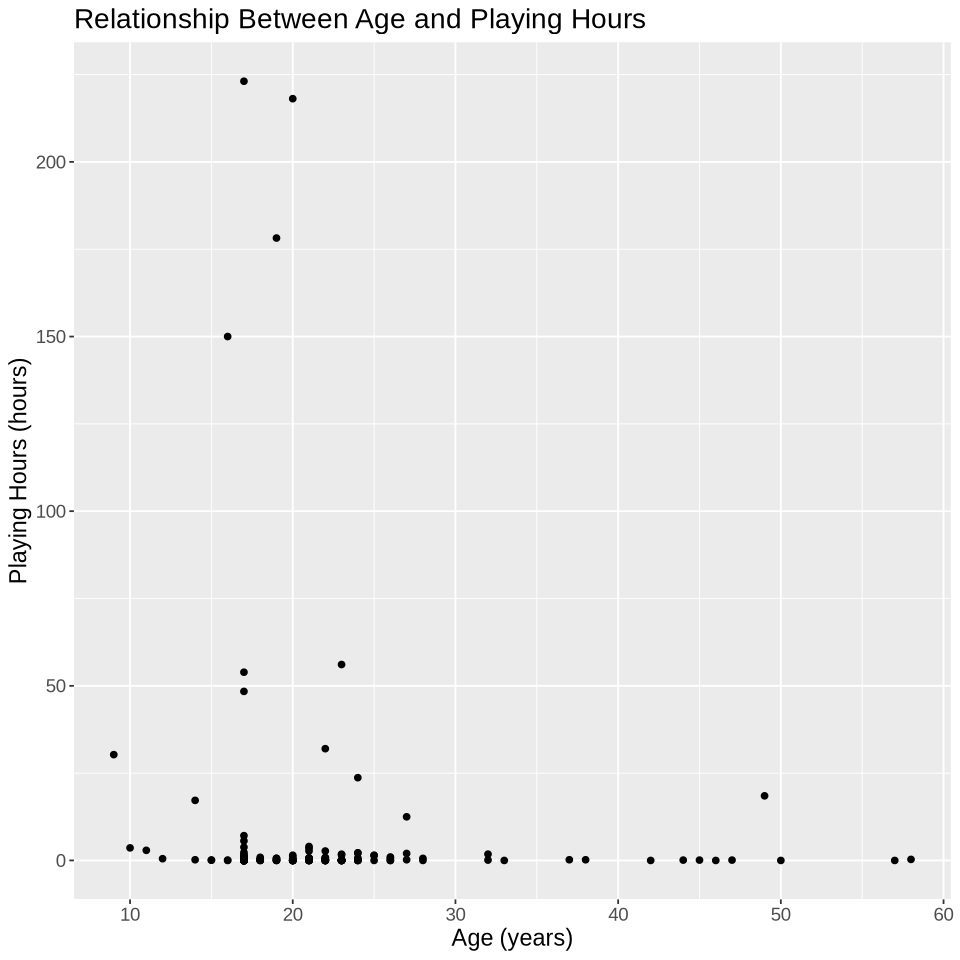

In [46]:
ggplot(data = players, aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(title = "Relationship Between Age and Playing Hours", x = "Age (years)", y = "Playing Hours (hours)") + 
    theme(text = element_text(size = 14))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


gender,n
<fct>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


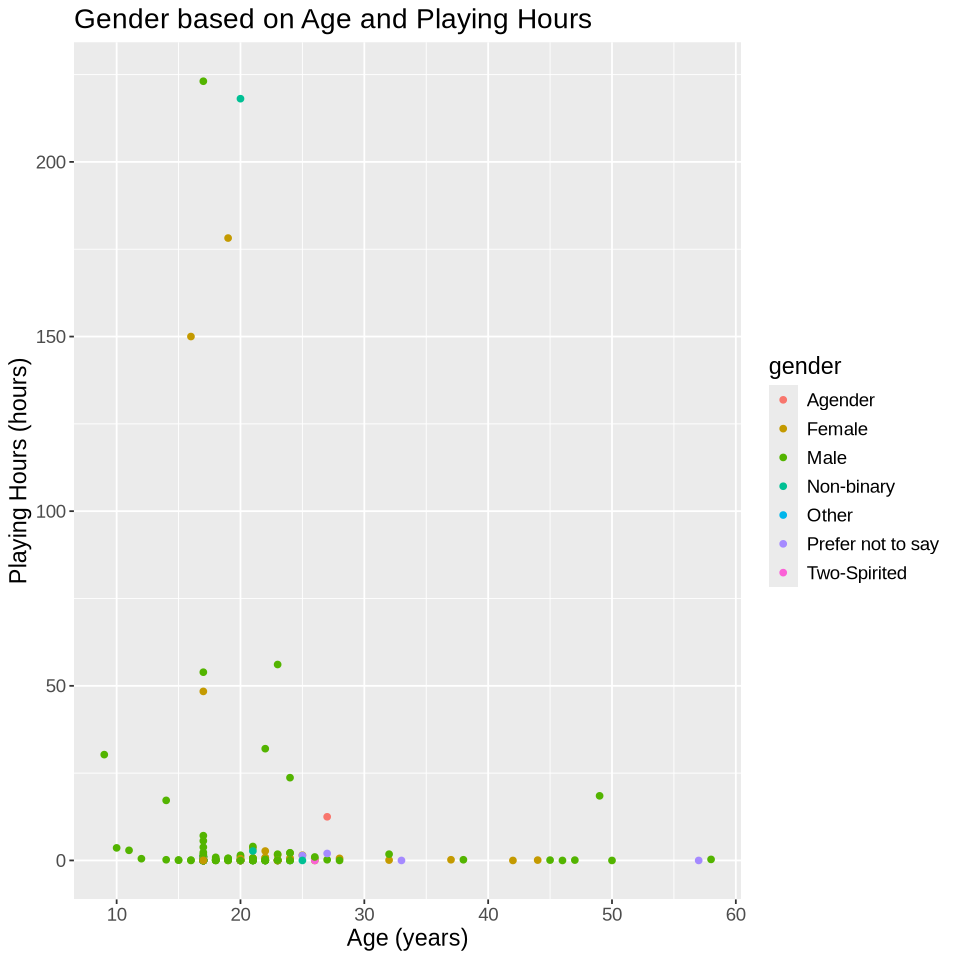

In [47]:
ggplot(data = players, aes(x = Age, y = played_hours, color = gender)) +
    geom_point() +
    labs(title = "Gender based on Age and Playing Hours", x = "Age (years)", y = "Playing Hours (hours)") + 
    theme(text = element_text(size = 14))

players |> 
    count(gender)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


experience,n
<fct>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


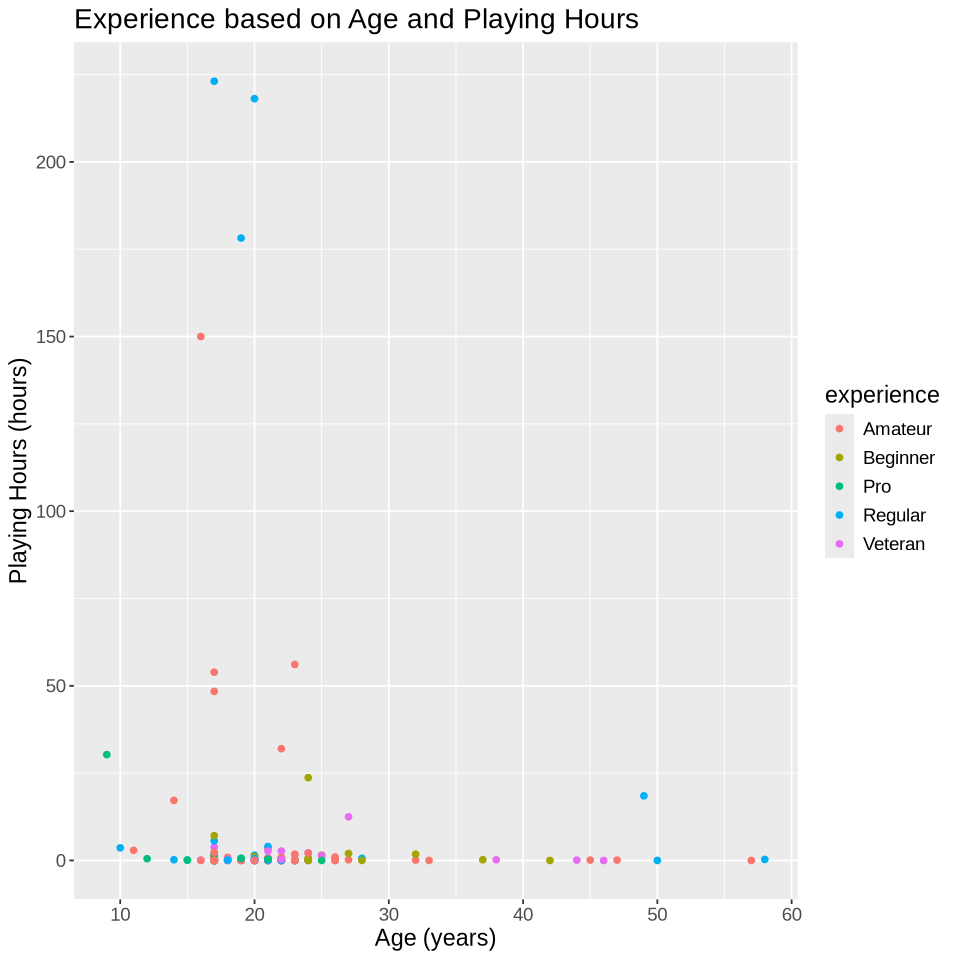

In [48]:
ggplot(data = players, aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(title = "Experience based on Age and Playing Hours", x = "Age (years)", y = "Playing Hours (hours)") + 
    theme(text = element_text(size = 14))

players |>
    count(experience)

## **(4) Methods and Plan:**
K-NN will be used. 